Introduction???

Titanic Survival Prediction Kaggle Project.
1) Data Gathering/Importing Data.
2) Exploratory Data Analysis
3) Data Transformation/PreProcessing.
4) Building the Models Using 3 different Classification Machine Learning Algorithms.
5) Calculating Accuracy Scores and cross validation scores.
6) Exporting the Output to file - "my_submission.csv" to submit on Kaggle website.

In [1]:
# Importing necessary libraries???

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import os
os.getcwd()                    #To get the current working directory...

'C:\\Users\\rahul3.tiwari\\Desktop\\TITANIC Survival Prediction KAGGLE Project'

In [2]:
#Data Gathering/Importing Data???

test_df = pd.read_csv("C:\\Users\\rahul3.tiwari\\Desktop\\TITANIC Survival Prediction KAGGLE Project\\test.csv")
train_df = pd.read_csv("C:\\Users\\rahul3.tiwari\\Desktop\\TITANIC Survival Prediction KAGGLE Project\\train.csv")

In [3]:
#Data Exploration????

print(train_df.shape)                       # dataframe.shape tells about the data set structure i.e (rows,columns) count.
print(test_df.shape)

(891, 12)
(418, 11)


In [4]:
print('Training Data Info :---')
train_df.info()
print('\n TEST Data Info:---')
test_df.info()

#You can observe here that

Training Data Info :---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 TEST Data Info:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [5]:
train_df.isnull().sum().sort_values(ascending=False).head()

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64

In [6]:
total_trn = train_df.isnull().sum().sort_values(ascending=False)
total_tst = test_df.isnull().sum().sort_values(ascending=False)
print('Training Data Total Null values: \n'+str(total_trn.head()))
print('\n')
print('Training Data Total Null values: \n'+str(total_tst.head()))

Training Data Total Null values: 
Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64


Training Data Total Null values: 
Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
dtype: int64


In [7]:
#Percent of Data Missing???

pct_trn = (round(train_df.isnull().sum()/train_df.isnull().count(),3) * 100).sort_values(ascending = False)
print('Training Data: \n'+ str(pct_trn.head()))


print('\n')
pct_tst = (round(test_df.isnull().sum()/test_df.isnull().count(),3) * 100).sort_values(ascending = False)
print('Test Data: \n'+ str(pct_tst.head()))

Training Data: 
Cabin       77.1
Age         19.9
Embarked     0.2
Fare         0.0
Ticket       0.0
dtype: float64


Test Data: 
Cabin       78.2
Age         20.6
Fare         0.2
Embarked     0.0
Ticket       0.0
dtype: float64


In [8]:
train_df.describe()     #Statistical Summary for the Data Set.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So seeing the above statistical Summary for the Data we can observe that:
    1) 0.38 is the Survived count that is 38% of the Total Survived.(See Mean row for Survived Column)
    2) Age of the Passenger ranges between (4 months to 80 Years roughly.) (See Min,Max values for Age.)

In [9]:
train_df.head(8)             #Just look at the few rows of training data set. Which columns can be dropped off??
#As of now it looks PassengerId, Name and Ticket Column can be dropped off since it doesn't have much significance.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


EDA (Exploratory Data Analysis) :

    
So what EDA tasks generally are to visualize the data set and look for the features which are correlated and will 
contribute most in Prediction. So by looking at those Visualizations we can come to conclusions for incuding the Features.
It also helps mostly in FEATURE SELECTION.

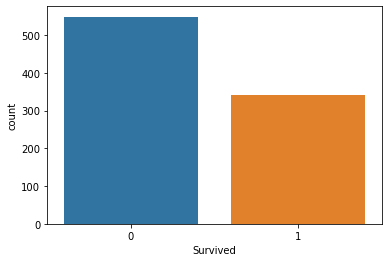

In [10]:
sns.countplot(train_df['Survived'])
plt.show()   # We already Concluded that 38% only Survived.

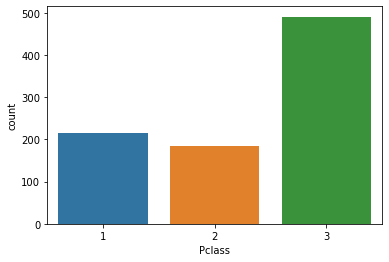

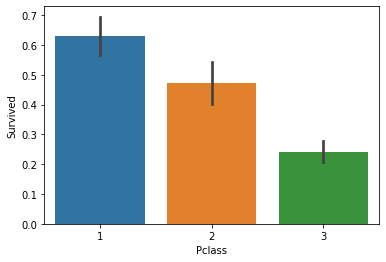

In [11]:
# Total Counts for Passengers of Different PClasses???

sns.countplot(train_df['Pclass'])
plt.show() #Most Passengers of Pclass = 3 are present.

sns.barplot(x = 'Pclass',y='Survived',data=train_df)
plt.show()    #But Most Passengers of Pclass = 1 did Survive.  Helpful for Prediction.

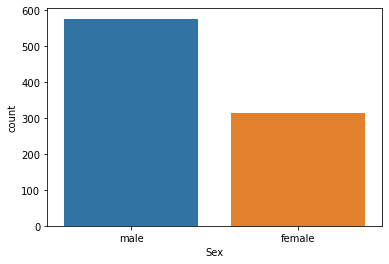

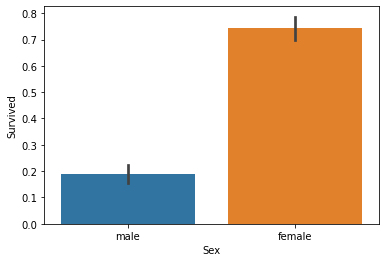

In [12]:
sns.countplot(train_df['Sex'])
plt.show()   #More number of Males are present.


sns.barplot(x = 'Sex',y = 'Survived',data=train_df)
plt.show()   #More number of Females are Survived. Helpful for Prediction.

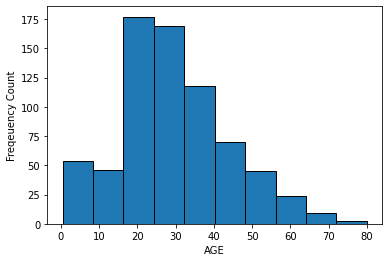

In [13]:
#For Age Column since its a Discrete Column with many values hence we plot Histogram to check the frequency Count:

plt.hist(train_df['Age'], edgecolor='Black')
plt.xlabel('AGE')
plt.ylabel('Freqeuency Count')
plt.show()   #Most Passengers fall in the range of 20 to 40 Years.

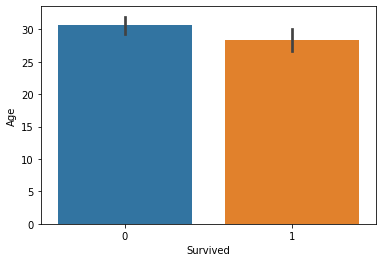

In [14]:
sns.barplot(x='Survived', y='Age', data=train_df)
plt.show()   #Here from this Bar graph we can only observe that both Survived and Non Survived were in almost same range.

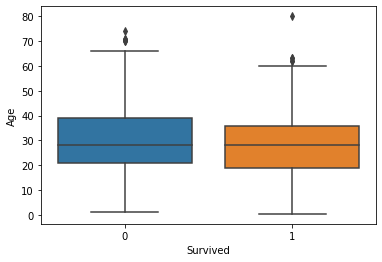

In [15]:
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.show()   #Here from this Box Plot we can see the Age range that <=30 have higher Survival Chances....

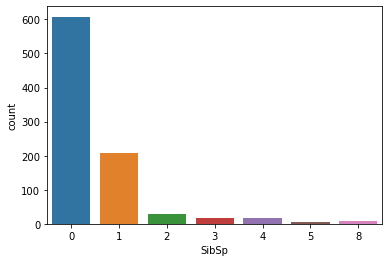

In [16]:
#sibsp:    Number of siblings / spouse on the Titanic Ship

sns.countplot(train_df['SibSp'])
plt.show()  #Almost 600 have 0 siblings/spouses with them.

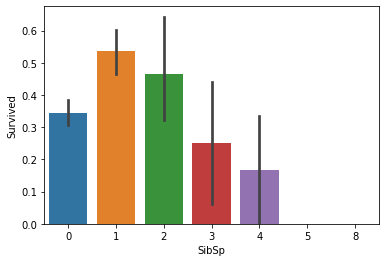

In [17]:
sns.barplot(x='SibSp',y='Survived',data=train_df)
plt.show()  #Most of the passengers travel with 1 sibling/spouse have highest probability for Survival.

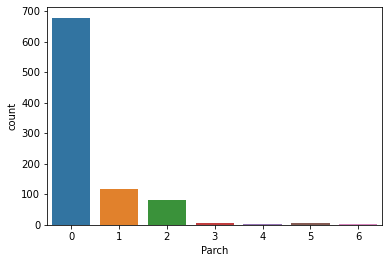

In [18]:
#parch:    Number of parents / children aboard the Titanic 

sns.countplot(train_df['Parch'])
plt.show()     # Close to 700 passengers are travelling with no parents/children.

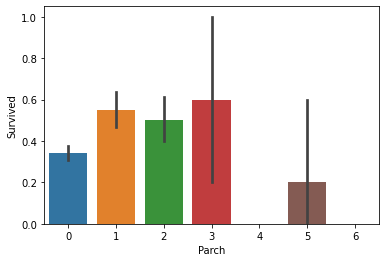

In [19]:
sns.barplot(x='Parch',y='Survived',data=train_df)
plt.show()  #Passengers who are travelling with parents/children are more likely to survive than those not.

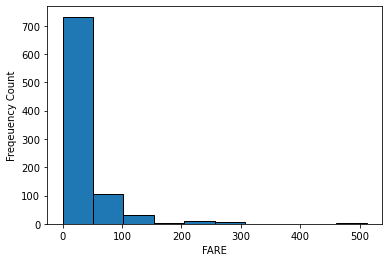

In [20]:
#Fare Column:

plt.hist(train_df['Fare'], edgecolor='Black')
plt.xlabel('FARE')
plt.ylabel('Freqeuency Count')
plt.show()

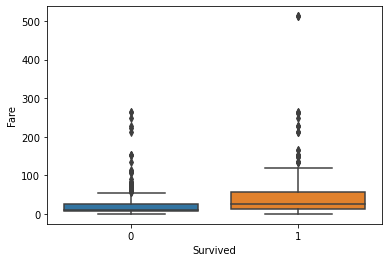

In [21]:
sns.boxplot(x='Survived',y='Fare',data=train_df)
plt.show()    #Passengers with Higher Fares are more likely to Survive as you can see below as well.

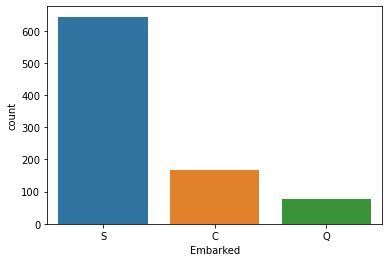

In [22]:
#Embarked:    Port at which Passenger Embarked.

sns.countplot(train_df['Embarked'])
plt.show()  #Most Number of Passenger embarked at port S>C>Q.

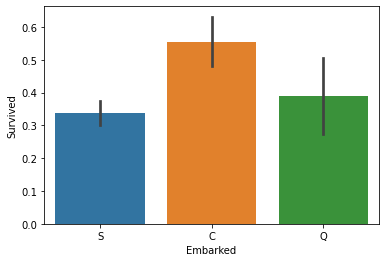

In [23]:
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.show() #Most Number of Passenger Survived at port C>Q>S.

#DATA PRE-PROCESSING:
1) DROPPING UNNECESSARY COLUMNS
2) HANDLING MISSING DATA
3) DATA TRANSFORMATION i.e. Handling Categorical Variables, If Needed Standardizing the Data Distribution.
4) MAKE READY DATA FOR BUILDING MODEL.

In [24]:
train_df_cpy = train_df.copy()   #Backing-up the Original Data.
test_df_cpy = test_df.copy()
train_df_cpy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#Dropping PassengerID Column from copy Train data.

train_df_cpy = train_df_cpy.drop(['PassengerId'], axis=1)
train_df_cpy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#HANDLING MISSING DATA???

1) CABIN Column missing Data since its huge amount of records missing and we can't simply drop this column hence we need to fill in the missing values for this column.
2) Age and Embarked column also needs to be handled with missing data.

In [26]:
#train_df_cpy['Cabin'].unique()
train_df_cpy['Cabin'].str[0].head(10)

0    NaN
1      C
2    NaN
3      C
4    NaN
5    NaN
6      E
7    NaN
8    NaN
9    NaN
Name: Cabin, dtype: object

In [27]:
dct = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8,"U": 9}
data_lst = [train_df_cpy, test_df_cpy]

for dataset in data_lst:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Cabin_Updtd'] = dataset['Cabin'].str[0]                #extracting first character from Cabin Column.
    dataset['Cabin_Updtd'] =  dataset['Cabin_Updtd'].map(dct)       #mapping dictionary on 'Cabin' column.
    dataset['Cabin_Updtd'] =  dataset['Cabin_Updtd'].fillna(0)      #any left-out value filling to 0
    dataset['Cabin_Updtd'] =  dataset['Cabin_Updtd'].astype(int)    #typecasting to Integer type

In [28]:
train_df_cpy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Updtd
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,9
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,9


In [29]:
#Now Age Column Handling????

data_lst = [train_df_cpy, test_df_cpy]

for dataset in data_lst:
    mean = train_df_cpy["Age"].mean()
    std = test_df_cpy["Age"].std()
    is_null = dataset["Age"].isnull().sum()                        #177 is the training data count for nulls present.
    
    # Generate random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill-in NaN values in Age column with random values generated
    age_updtd = dataset["Age"].copy()                #Copying all the list of Values of Ages col to age_updt variable.
    age_updtd[np.isnan(age_updtd)] = rand_age
    dataset["Age"] = age_updtd
    dataset["Age"] = train_df_cpy["Age"].astype(int) #typecasting to integer datatype.

In [30]:
test_df_cpy["Age"].isnull().sum()    #Handled missing values for Age column now.

0

In [31]:
#Embarked Col has 2 missing data values which can be handled with MODE i.e most occuring value.
train_df_cpy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
data_lst = [train_df_cpy, test_df_cpy]

for dataset in data_lst:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')  #Handled missing values for Embarked column also.

In [33]:
train_df_cpy["Embarked"].isnull().sum()  

0

In [34]:
#train_df_cpy.info()   #No NULLS now
test_df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int32  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Cabin_Updtd  418 non-null    int32  
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
train_df_cpy['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [36]:
#Working on DATA Transformation now to Convert Object Columns to Numerals:
#1st NAME column:

train_df_cpy['Prefix']= train_df_cpy['Name'].str.extract('([A-Za-z]+)\.')
train_df_cpy['Prefix'].value_counts() #Most common are Mr, Miss, Mrs,Master etc...

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Mme           1
Jonkheer      1
Capt          1
Don           1
Ms            1
Lady          1
Sir           1
Name: Prefix, dtype: int64

In [37]:
test_df_cpy['Prefix']= test_df_cpy['Name'].str.extract('([A-Za-z]+)\.')
test_df_cpy['Prefix'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Prefix, dtype: int64

In [38]:
train_df_cpy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Updtd,Prefix
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,U0,S,9,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,U0,S,9,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,Mrs
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,U0,S,9,Mr


In [39]:
#Name Column Data Transformation to be changed to Numerals below:

data_lst = [train_df_cpy,test_df_cpy]
prefixes = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}

for dataset in data_lst:
    dataset['Prefix'].replace(['Lady'], 'Mrs', inplace=True)
    dataset['Prefix'].replace(['Ms','Mme','Mlle','Countess'], 'Mrs', inplace=True)
    dataset['Prefix'].replace(['Sir','Rev'], 'Mr', inplace=True)
    dataset['Prefix'].replace(['Capt', 'Col','Don','Dr','Major','Jonkheer', 'Dona'],'Others',inplace = True)
    dataset['Prefix'] = dataset['Prefix'].map(prefixes)

In [40]:
train_df_cpy.head()   #Name Column Changed to numerical type. Now No need of Name column hence dropped off.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Updtd,Prefix
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,U0,S,9,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,U0,S,9,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,U0,S,9,1


In [41]:
#Converting 'Fare' column Float type to int type :

data_lst = [train_df_cpy, test_df_cpy]

for dataset in data_lst:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [42]:
#Sex: Convert ‘Sex’ feature into numeric.

gndr = {"male": 0, "female": 1}
data_lst = [train_df_cpy, test_df_cpy]

for dataset in data_lst:
    dataset['Sex'] = dataset['Sex'].map(gndr)

In [43]:
#Embarked Column: Changing to Numeral type.

data_lst = [train_df_cpy, test_df_cpy]
port_embrkd = {"S": 0, "C": 1, "Q": 2}

for dataset in data_lst:
    dataset['Embarked'] = dataset['Embarked'].map(port_embrkd)

In [44]:
train_df_cpy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Updtd,Prefix
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,U0,0,9,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,1,3,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,U0,0,9,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,0,3,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,U0,0,9,1


In [45]:
#Now finally dropping unnecessary columns like: 'Ticket','Cabin','Name' etc..

data_lst = [train_df_cpy, test_df_cpy]

for dataset in data_lst:
    dataset = dataset.drop(['Ticket','Cabin','Name'],axis =1,inplace = True)

In [46]:
train_df_cpy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Updtd,Prefix
0,0,3,0,22,1,0,7,0,9,1
1,1,1,1,38,1,0,71,1,3,3
2,1,3,1,26,0,0,7,0,9,2
3,1,1,1,35,1,0,53,0,3,3
4,0,3,0,35,0,0,8,0,9,1


In [47]:
#So if you look at all the Columns you can see that other than Age, Fare all columns are mostly Categorized into (0,1,2...)
#Hence I will try to Categorize Age and Fare columns also to Standardize the Data set evenly.

data_lst = [train_df_cpy, test_df_cpy]

for dataset in data_lst:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] >=12) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] >=19) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[ dataset['Age'] >= 41, 'Age'] = 6

In [48]:
train_df_cpy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Updtd,Prefix
0,0,3,0,2,1,0,7,0,9,1
1,1,1,1,5,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,9,2
3,1,1,1,5,1,0,53,0,3,3
4,0,3,0,5,0,0,8,0,9,1


In [49]:
data_lst = [train_df_cpy, test_df_cpy]

for dataset in data_lst:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 15), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] >= 32) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] >= 100) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] >= 251, 'Fare'] = 5    

In [50]:
train_df_cpy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Updtd,Prefix
0,0,3,0,2,1,0,0,0,9,1
1,1,1,1,5,1,0,3,1,3,3
2,1,3,1,3,0,0,0,0,9,2
3,1,1,1,5,1,0,3,0,3,3
4,0,3,0,5,0,0,0,0,9,1


In [51]:
test_df_cpy.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Updtd,Prefix
0,892,3,0,2,0,0,0,2,9,1
1,893,3,1,5,1,0,0,0,9,3
2,894,2,0,3,0,0,1,2,9,1
3,895,3,0,5,0,0,0,0,9,1
4,896,3,1,5,1,1,1,0,9,3


In [52]:
X_train = train_df_cpy.drop("Survived", axis=1).copy()
y_train = train_df_cpy["Survived"]

X_test = test_df_cpy.drop("PassengerId", axis=1).copy()
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Updtd,Prefix
0,3,0,2,0,0,0,2,9,1
1,3,1,5,1,0,0,0,9,3
2,2,0,3,0,0,1,2,9,1
3,3,0,5,0,0,0,0,9,1
4,3,1,5,1,1,1,0,9,3


Building Machine Learning Models:

In [65]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Updtd,Prefix
0,3,0,2,1,0,0,0,9,1
1,1,1,5,1,0,3,1,3,3
2,3,1,3,0,0,0,0,9,2
3,1,1,5,1,0,3,0,3,3
4,3,0,5,0,0,0,0,9,1


In [54]:
y_train.head()                    #Survived Column

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [66]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Updtd,Prefix
0,3,0,2,0,0,0,2,9,1
1,3,1,5,1,0,0,0,9,3
2,2,0,3,0,0,1,2,9,1
3,3,0,5,0,0,0,0,9,1
4,3,1,5,1,1,1,0,9,3


In [67]:
#Implementing Logistic Regression ML Algorithm below with accuracy scores???

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

accuracy_logreg = round(reg.score(X_train, y_train) * 100, 2)   #Calculating Accuracy Scores for the Model
accuracy_logreg

81.93

In [68]:
#Implementing Decision Tree ML Algorithm below with accuracy scores???

from sklearn.tree import DecisionTreeClassifier

reg1 = DecisionTreeClassifier() 
reg1.fit(X_train, y_train)

y_pred1 = reg1.predict(X_test)

accuracy_dcsn_tree = round(reg1.score(X_train, y_train) * 100, 2)
accuracy_dcsn_tree

92.93

In [69]:
#Implementing Random Forest Classification ML Algorithm below with accuracy scores???

from sklearn.ensemble import RandomForestClassifier

reg2 = RandomForestClassifier(n_estimators=100)
reg2.fit(X_train, y_train)

y_pred2 = reg2.predict(X_test)

accuracy_random_forest = round(reg2.score(X_train, y_train) * 100, 2)
accuracy_random_forest

92.93

In [70]:
#K-fold cross Validation:
#K-Fold Cross Validation randomly splits the training data into K subsets called folds. Random forest model would be trained 
#and evaluated K times using a different fold for evaluation everytime, use a different fold for testing while it would be 
#trained on the remaining K-1 folds (Data_Subsets rows).

from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=100) #is the number of trees you want to build before taking the maximum voting
# or averages of predictions. Higher number of trees give you better performance but makes your code slower.
scores = cross_val_score(rf_clf, X_train, y_train, cv=10)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.80898876 0.73033708 0.82022472 0.84269663 0.86516854
 0.82022472 0.82022472 0.83146067 0.83146067]
Mean: 0.8170786516853932
Standard Deviation: 0.033605838101447405


In [59]:
#As you can see the average accuracy scores stands out to be almost 82% that means we have a fair percentage of accurate prediction
#scores and there is standard deviation between these accuracy score of +- 3%.

In [71]:
my_submission = pd.DataFrame({'PassengerId': test_df_cpy['PassengerId'], 'Survived': y_pred2.astype(int)})
my_submission.to_csv('my_submission.csv', index=False)

In [72]:
my_submission['Survived'].value_counts()

0    264
1    154
Name: Survived, dtype: int64